Doing sentiment analysis using .sentiment (line 8)

Create WordCloud using polarity and wordcloud and stopwords (line 34)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# uploading the csv file. 
# include r in front to remove unicode error
# To solve the issue of parsererror, include error_bad_lines=False, which means ignore all bad lines/error from the dataframe
# head() returns the first 5 observations from my dataframe

youtubedata= pd.read_csv(r'C:/datascience/DataScience/Youtube_project_shan_singh/UScomments.csv',error_bad_lines=False)
youtubedata.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Kate\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
%%html
<style type='text/css'>
.CodeMirror{font-style: Serif;
           font-size:16px;}
</style>

Perform sentiment analysis

Sentiment analysis is looking at sentiments of the users.

That means, you take care of 1) polarity and 2) subjectivity

Polarity values range: -1 to +1
    
If there's no sentiment or polarity, then consider subjectivity

Packages useful in sentiment analysis:

    1) TextBlob (NLP library)
    
    2) Vader
    
    3) Epacy

In [4]:
# run isnull().sum() gives you 25 missing values

youtubedata.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
# drop all the missing values by doing  dropna(inplace=True)

youtubedata.dropna(inplace=True)

In [6]:
youtubedata.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
# install textblob package
# and then import TextBlob from textblob package

!pip install textblob
from textblob import TextBlob

In [22]:
# parse a comment from dataframe and do .sentiment

TextBlob('trending 😉').sentiment.polarity

0.0

In [23]:
# sample of data (as df) from original dataset because the original dataset is too large

df=youtubedata[0:10000]

In [27]:
polarity=[]

for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(NA)

In [28]:
df['polarity']=polarity

<ipython-input-28-2767a4248e18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity']=polarity


In [29]:
df.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [34]:
# all the instances where in df that has polarity ==1

df_positive=df[df['polarity']==1]
df_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
9841,3x-sUsazQ90,Great video and narration!,0,0,1.0
9842,3x-sUsazQ90,This is really impressive,0,0,1.0
9844,3x-sUsazQ90,Placed an order yesterday. Will be patiently w...,0,0,1.0
9889,7Lyo5dCig-U,"That would honestly be me, lol!",0,0,1.0


In [35]:
df_negative=df[df['polarity']==-1]
df_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [37]:
# install wordcloud

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [38]:
# the following returns series of dataframe df

df_negative['comment_text']

512     BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562     Well… The brain surgeon Ben Carson just proved...
952            WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                       WTF BRUH!!!!!!
1391                      cheeseus christ thats insane!!!
1932            this is the worst thing i've heard. ever.
2043    Economy is horrible in Cuba. It's going to be ...
2088                        Sub to me if this is terrible
2192                                             PATHETIC
2410    I don't like this sportscaster  sounds very an...
2482                               commentators are awful
2728    This tv show became trump witch hunt tube... a...
2733    Arpaio should be arrested again for horribly b...
2750        This  show has become one-noted and pathetic.
2817                                HARD CANDY!!!!!!!!!!!
2886                  Tired of the philosophy add !!!!!!!
3086                                               boring
3092          

In [40]:
# join each and every row using the separator ' '
# and reassign negative comments as a new variable

neg_comments=' '.join(df_negative['comment_text'])
neg_comments

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

(-0.5, 399.5, 199.5, -0.5)

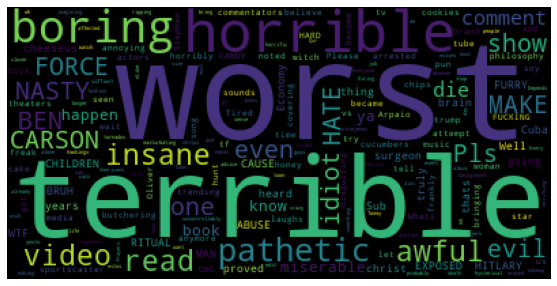

In [46]:
#eliminate all the stopwords by doing WordCloud(stopwords=set(STOPWORDS))

wordcloud1=WordCloud(stopwords=set(STOPWORDS)).generate(neg_comments)

# set figure size
plt.figure(figsize=(15,5))


# showcase wordcloud
plt.imshow(wordcloud1)


#disable axis
plt.axis('off')

In [47]:
df_positive['comment_text']

64                                        yu are the best
156     Power is the disease.  Care is the cure.  Keep...
227     YAS Can't wait to get it! I just need to sell ...
307                                     This is priceless
319                                   Summed up perfectly
                              ...                        
9841                           Great video and narration!
9842                            This is really impressive
9844    Placed an order yesterday. Will be patiently w...
9889                      That would honestly be me, lol!
9993    perfect opportunity for these metal detector d...
Name: comment_text, Length: 246, dtype: object

In [48]:
pos_comments=' '.join(df_positive['comment_text'])
pos_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

(-0.5, 399.5, 199.5, -0.5)

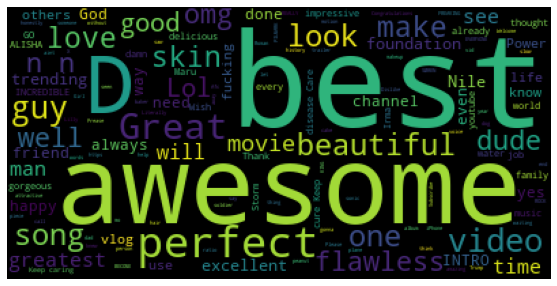

In [50]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(pos_comments)

plt.figure (figsize=(15,5))
plt.imshow (wordcloud2)
plt.axis ('off')